In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [32]:
%matplotlib inline

In this short tutorial we are going to use `Support Vector Machine` machine learning algorithm to classify electric devices plugged into the power outlet, based on different electric parameters (The parameters will be described in the `column_mapping` dictionary)

As this a supervised algorithm, all the measurements are labeled, i.e. we know the device type. The dataset is already split into a training (used to teach the model) and a testing set (to verify the correctness of our machine learning model)

In [12]:
train_file = 'train_data.csv'

In [13]:
df_train = pd.read_csv(train_file,
                      header=0,
                      sep=",",
                      decimal=".",
                      skipinitialspace=True,
                      skip_blank_lines=False)

In [33]:
df_train.head()

# This is how the training set looks like. The output column contains the electric device names

NT   PC   PTA   PTP  LL  TMP  H0  H1  H2  H3  H4  H5      output
0   3  121  4819  1674  74   24  38  14  18  14   7   6  hair dryer
1   4  131  4795  1576  76   24  38  14  17  14   7   6  hair dryer
2   5  122  4782  1648  85   24  38  14  18  14   7   6  hair dryer
3   6  122  4793  1647  81   24  38  14  17  14   7   6  hair dryer
4   7  121  4823  1677  75   24  38  14  17  14   7   7  hair dryer

In [15]:
column_mapping= {'NT': 'nr_transient',
                 'PTA': 'power_transient_average',
                 'PTP': 'power_transient_peak',
                 'PC': 'power_current',
                 'H0': 'harmonic_1',
                 'H1': 'harmonic_2',
                 'H2': 'harmonic_3',
                 'H3': 'harmonic_4',
                 'H4': 'harmonic_5',
                 'H5': 'harmonic_6'}

We use normalization to plot all the relevant input parameters in a multi-plot. By relevant I mean, parameters that have direct effect on the output type (they have to be included in our model)

In [35]:
col_to_normalize = ['PC', 'PTA', 'PTP', 'H0', 'H1', 'H2', 'H3', 'H4', 'H5']

def norm_column(column):
    max_val, min_val = column.max(), column.min()
    return (column -min_val) / (max_val - min_val)

In [36]:
norm_df = df_train.loc[:, col_to_normalize].apply(norm_column)
norm_df.head()

PC       PTA       PTP   H0   H1        H2   H3        H4        H5
0  0.922481  0.999155  0.421380  0.0  1.0  0.435897  1.0  0.272727  0.857143
1  1.000000  0.994083  0.395952  0.0  1.0  0.410256  1.0  0.272727  0.857143
2  0.930233  0.991336  0.414634  0.0  1.0  0.435897  1.0  0.272727  0.857143
3  0.930233  0.993660  0.414375  0.0  1.0  0.410256  1.0  0.272727  0.857143
4  0.922481  1.000000  0.422159  0.0  1.0  0.410256  1.0  0.272727  1.000000

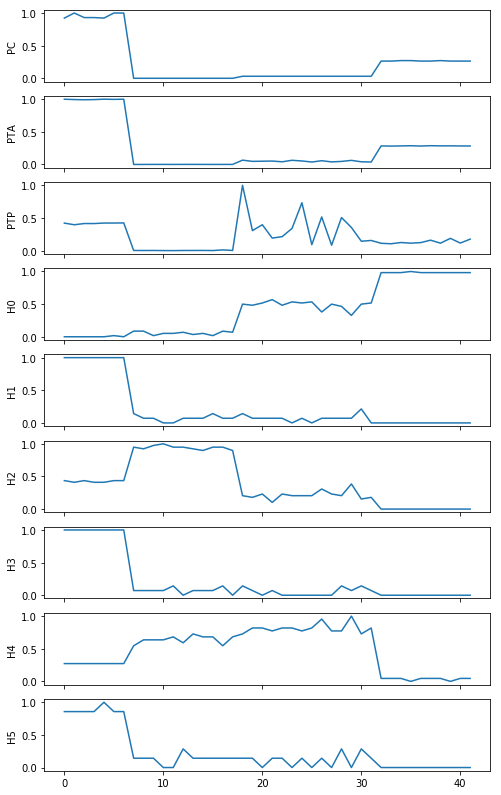

In [38]:
fig, ax = plt.subplots(nrows=len(col_to_normalize), ncols=1, sharex=True, figsize=(8, 14))

for i, col_name in enumerate(col_to_normalize):
    ax[i].plot(norm_df[col_name])
    ax[i].set_ylabel(col_name)

plt.show()

# There are 4 device types in our current model - the border between these 4 devices is clearly visible from this graph

In [19]:
selected_x = df_train.loc[:, col_to_normalize]
selected_y = df_train['output']

In [20]:
X_train = np.array(selected_x)
y_train = np.array(selected_y)

In [21]:
test_file = 'test_data.csv'

In [22]:
df_test_set = pd.read_csv(test_file,
                          header=0,
                          sep=",",
                          decimal=".",
                          skipinitialspace=True,
                          skip_blank_lines=False)

In [23]:
df_test_set.head()

NT   PC   PTA   PTP  LL  TMP  H0  H1  H2  H3  H4  H5      output
0  10  130  4796  1575  87   25  38  14  18  14   7   6  hair dryer
1  11  130  4791  1661  81   24  38  14  18  14   7   6  hair dryer
2  12  130  4778  1626  87   24  38  14  17  14   7   7  hair dryer
3  54    2    93    54  75   24  41   2  37   1  16   0         led
4  55    2    92    58  83   24  41   2  36   0  17   2         led

In [24]:
selected_x_test = df_test_set.loc[:, col_to_normalize]
selected_y_test = df_test_set['output']

In [25]:
X_test = np.array(selected_x_test)
y_test = np.array(selected_y_test)

The following cell prepares an `svm` classifier and fits the model

In [26]:
classifier = svm.SVC(decision_function_shape='ovr', C=1, kernel='poly')
classifier.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

`score` calculates the accuracy of our model

In [27]:
confidence = classifier.score(X_test, y_test)
confidence

1.0

The easiest way to save and use our model in other programs is to use `pickle`

In [28]:
import pickle
with open('smart_meter_svm_model.pickle','wb') as f:
    pickle.dump(classifier, f)

In [40]:
df_test_set.loc[:, col_to_normalize + ['output']]

PC   PTA   PTP  H0  H1  H2  H3  H4  H5        output
0   130  4796  1575  38  14  18  14   7   6    hair dryer
1   130  4791  1661  38  14  18  14   7   6    hair dryer
2   130  4778  1626  38  14  17  14   7   7    hair dryer
3     2    93    54  41   2  37   1  16   0           led
4     2    92    58  41   2  36   0  17   2           led
5     2    92    59  40   1  37   1  16   2           led
6     6   270   329  57   0  17   0  23   1  power source
7     6   267   293  60   3  11   2  19   2  power source
8     6   370   423  66   4   6   3  16   3  power source
9     6   269   859  67   1   8   2  18   1  power source
10   36  1427   733  95   0   1   0   2   0    light bulb
11   36  1457  1148  95   0   1   0   2   0    light bulb

use `classifier.predict()` if you want test the correctness of the model

In [41]:
predict_val = classifier.predict(np.array([[130,4796,1575,38,14,18,14,7,6]]))
predict_val

array(['hair dryer'], dtype=object)